In [64]:
import cv2
import glob
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import random

In [65]:
os.chdir('C:/Users/Shantanu Bhavsar/Downloads/Skin cancer dataset jyp Resized/train')


In [66]:
image_array = [] 
files = glob.glob ("*.jpg")
for myFile in files:
    image = cv2.imread (myFile, cv2.COLOR_BGR2RGB)
    image_array.append (cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
# // this will print the channel number, size, and number of images in the file

train_x = np.array(image_array)

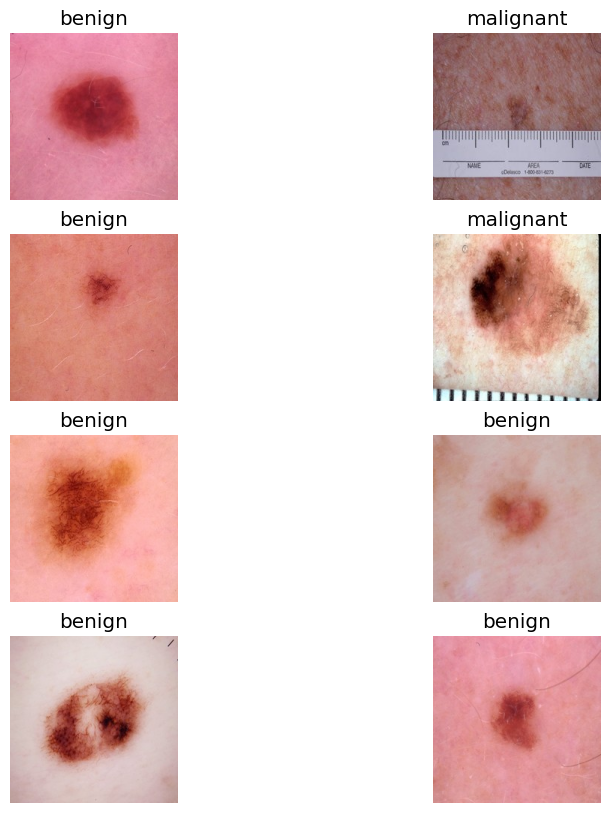

In [67]:
import random
fig = plt.figure(figsize=(10, 10))
for i,rand in enumerate(random.sample(range(1,2000),8)):
    fig.add_subplot(4, 2, i+1)  
    plt.imshow(train_x[rand,:,:,:])
    plt.axis('off')
    plt.title(files[rand].split("$")[0])

In [68]:
print(train_x) 

[[[[234 144 170]
   [233 143 169]
   [231 143 168]
   ...
   [234 141 168]
   [234 141 168]
   [233 140 167]]

  [[232 142 168]
   [232 142 168]
   [231 143 168]
   ...
   [233 140 167]
   [234 141 168]
   [233 140 167]]

  [[229 139 165]
   [230 140 166]
   [232 142 168]
   ...
   [232 139 166]
   [233 140 167]
   [233 140 167]]

  ...

  [[211 133 146]
   [208 130 143]
   [207 129 142]
   ...
   [213 144 147]
   [211 142 145]
   [209 140 143]]

  [[211 133 146]
   [211 133 146]
   [210 132 145]
   ...
   [209 140 143]
   [207 138 141]
   [206 137 140]]

  [[209 131 144]
   [211 133 146]
   [211 133 146]
   ...
   [208 139 142]
   [208 139 142]
   [208 139 142]]]


 [[[210 174 202]
   [211 175 201]
   [209 174 198]
   ...
   [209 174 196]
   [209 175 199]
   [211 177 201]]

  [[209 172 203]
   [210 174 202]
   [209 174 198]
   ...
   [209 174 196]
   [209 175 199]
   [210 176 200]]

  [[215 178 211]
   [214 177 208]
   [212 176 202]
   ...
   [207 172 194]
   [206 173 194]
   [206 173

In [69]:
train_y = []
for i in range (0, len(files)):
  x = files[i].split("$")
  train_y.append(x[0])

print(train_y)

['benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign',

In [70]:
from sklearn import preprocessing
yt = preprocessing.LabelEncoder()
yt.fit(train_y)
print(list(yt.classes_))
test=yt.transform(train_y)
train_y=test
print(train_y)

['benign', 'malignant']
[0 0 0 ... 1 1 1]


In [71]:
os.chdir('C:/Users/Shantanu Bhavsar/Downloads/Skin cancer dataset jyp Resized/test')

In [72]:
test_array=[]
files_test = glob.glob('*.jpg')
for testfile in files_test:
  img = cv2.imread(testfile)
  test_array.append(img)

test_x = np.array(test_array)

In [73]:
print(test_x)

[[[[164 133 230]
   [158 127 224]
   [156 125 222]
   ...
   [153 136 223]
   [153 137 224]
   [159 143 230]]

  [[163 132 229]
   [158 127 224]
   [155 124 221]
   ...
   [154 137 224]
   [153 137 224]
   [156 140 227]]

  [[163 133 228]
   [158 128 223]
   [156 126 221]
   ...
   [157 141 225]
   [155 140 224]
   [154 139 223]]

  ...

  [[153 148 217]
   [149 144 213]
   [147 141 212]
   ...
   [144 142 212]
   [143 141 211]
   [140 138 208]]

  [[150 145 214]
   [148 143 212]
   [149 141 212]
   ...
   [145 143 213]
   [141 141 211]
   [138 138 208]]

  [[151 146 215]
   [150 145 214]
   [153 145 216]
   ...
   [145 143 213]
   [141 141 211]
   [138 138 208]]]


 [[[120 102 195]
   [121 103 196]
   [122 104 197]
   ...
   [134 113 206]
   [134 113 206]
   [132 111 204]]

  [[119 101 194]
   [119 101 194]
   [121 103 196]
   ...
   [130 109 202]
   [130 109 202]
   [130 109 202]]

  [[123 105 198]
   [123 105 198]
   [124 105 198]
   ...
   [127 106 199]
   [129 108 201]
   [133 112

In [74]:
test_x.shape

(660, 224, 224, 3)

In [75]:
test_y = []
for i in range (0, len(files_test)):
  x = files_test[i].split("$")
  test_y.append(x[0])

print(test_y)

['benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign',

In [76]:
test_2=yt.transform(test_y)
test_y=test_2
print(test_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
from keras.models import Sequential

head = baseModel.output
head = tf.keras.layers.Conv2D(32, (3, 3), strides=2,activation='relu',padding = 'same')(head)
head = tf.keras.layers.MaxPooling2D(3, 3)(head)
head = tf.keras.layers.Conv2D(32, (3, 3),strides=2,padding = 'same', activation='relu')(head)
head = tf.keras.layers.Conv2D(64, (3, 3),strides=2,padding = 'same', activation='relu')(head)
head = tf.keras.layers.Flatten()(head)
head = tf.keras.layers.Dense(32, activation='relu')(head)
head = Dropout(0.1)(head)
head = tf.keras.layers.Dense(2, activation='softmax')(head)

model = Model(inputs=baseModel.input, outputs=head)

In [78]:
model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [79]:
# model.fit(train_x, train_y, batch_size = 16, epochs=20, validation_data = (test_x, test_y))
N=5
H = model.fit(aug.flow(train_x, train_y, batch_size = 16),epochs=N, validation_data = (test_x, test_y))

Epoch 1/5
165/165 [==============================] - 27s 135ms/step - loss: 0.4699 - accuracy: 0.7694 - val_loss: 4.0177 - val_accuracy: 0.5470
Epoch 2/5
165/165 [==============================] - 21s 124ms/step - loss: 0.4033 - accuracy: 0.8180 - val_loss: 2.1802 - val_accuracy: 0.6561
Epoch 3/5
165/165 [==============================] - 19s 114ms/step - loss: 0.3872 - accuracy: 0.8343 - val_loss: 1.8996 - val_accuracy: 0.7667
Epoch 4/5
165/165 [==============================] - 21s 125ms/step - loss: 0.3861 - accuracy: 0.8312 - val_loss: 0.7753 - val_accuracy: 0.7076
Epoch 5/5
165/165 [==============================] - 20s 121ms/step - loss: 0.3649 - accuracy: 0.8316 - val_loss: 0.5572 - val_accuracy: 0.7682


In [80]:

 from PIL import Image
from numpy import asarray
 
# load the image and convert into
# numpy array
img = Image.open('C:/Users/Shantanu Bhavsar/Downloads/bening1313.jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)
# print(test)

(1, 224, 224, 3)


C:\Users\Shantanu Bhavsar\AppData\Local\Temp\ipykernel_1488\1855174229.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = img.resize((224,224), Image.ANTIALIAS)


In [81]:
pred = model.predict(new)
print(pred)
if np.argmax(pred) == 0:
  print('BENIGN')
 
else:
  print('MALIGNANT')

1/1 [==============================] - 1s 612ms/step
[[0.88076895 0.11923108]]
BENIGN


In [82]:

 from PIL import Image
from numpy import asarray
 
# load the image and convert into
# numpy array
img = Image.open('C:/Users/Shantanu Bhavsar/Downloads/TESTSKIN_CANCER/skin_cancer$malignant24.jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)
# print(test)

(1, 224, 224, 3)


C:\Users\Shantanu Bhavsar\AppData\Local\Temp\ipykernel_1488\3814470934.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = img.resize((224,224), Image.ANTIALIAS)


In [83]:
pred = model.predict(new)
print(pred)
if np.argmax(pred) == 0:
  print('BENIGN')
 
else:
  print('MALIGNANT')

1/1 [==============================] - 0s 5ms/step
[[0.170281   0.82971907]]
MALIGNANT


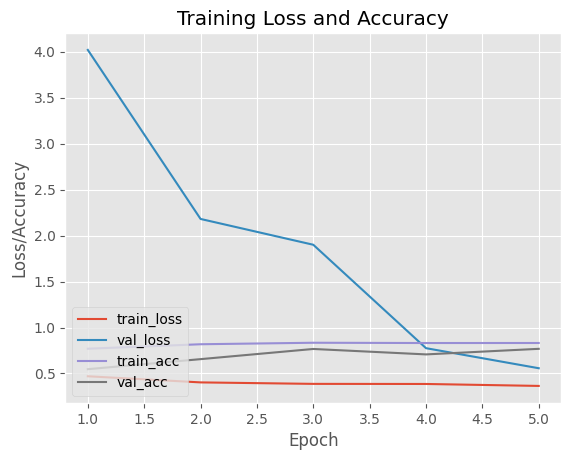

In [84]:
k = N
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, k+1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, k+1), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, k+1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, k+1), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [86]:
import h5py
# model = (Sequential())
model.save('D:/New folder/Skin_2types.h5')

In [87]:
import h5py
import keras
types_sc_model = keras.models.load_model('D:/New folder/Skin_2types.h5',compile=False)

import tensorflow as tf 
tflite_model_file = "D:/New folder/Skin_2types.tflite"

converter= tf.lite.TFLiteConverter.from_keras_model(types_sc_model)
sd_sc = converter.convert()
with open(tflite_model_file, 'wb') as f:
  f.write(sd_sc)

INFO:tensorflow:Assets written to: C:\Users\SHANTA~1\AppData\Local\Temp\tmp_19obf78\assets


INFO:tensorflow:Assets written to: C:\Users\SHANTA~1\AppData\Local\Temp\tmp_19obf78\assets
